<a href="https://colab.research.google.com/github/sabrina0329/handwritten-recognition/blob/notebook/handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import tensorflow as tf

In [16]:
pip install keras-tuner

In [17]:
!pip install gdown

In [5]:
!pip install rarfile
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [18]:
#import gdown
#data_set= '/content/handwritten dataset.rar'


In [19]:
#import rarfile
#rar = rarfile.RarFile('/content/handwritten dataset.rar')
#rar.extractall()



In [6]:
import gdown
dataset_img = 'https://drive.google.com/uc?id=1d3g3hcstIggbIqJOLUEg5h7fEbYewtGD'
gdown.download(dataset_img)

Downloading...
From: https://drive.google.com/uc?id=1d3g3hcstIggbIqJOLUEg5h7fEbYewtGD
To: /content/Img.zip
100%|██████████| 16.4M/16.4M [00:00<00:00, 71.6MB/s]


'Img.zip'

In [7]:
!unzip Img.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Img/img006-043.png      
  inflating: __MACOSX/Img/._img006-043.png  
  inflating: Img/img041-035.png      
  inflating: __MACOSX/Img/._img041-035.png  
  inflating: Img/d_4.jpeg            
  inflating: __MACOSX/Img/._d_4.jpeg  
  inflating: Img/k_27.jpeg           
  inflating: __MACOSX/Img/._k_27.jpeg  
  inflating: Img/img036-010.png      
  inflating: __MACOSX/Img/._img036-010.png  
  inflating: Img/img026-004.png      
  inflating: __MACOSX/Img/._img026-004.png  
  inflating: Img/x_18.jpeg           
  inflating: __MACOSX/Img/._x_18.jpeg  
  inflating: Img/img026-010.png      
  inflating: __MACOSX/Img/._img026-010.png  
  inflating: Img/z_25.jpeg           
  inflating: __MACOSX/Img/._z_25.jpeg  
  inflating: Img/img036-004.png      
  inflating: __MACOSX/Img/._img036-004.png  
  inflating: Img/f_29.jpeg           
  inflating: __MACOSX/Img/._f_29.jpeg  
  inflating: Img/d_14.jpeg         

In [8]:
import gdown
dataset_csv = 'https://drive.google.com/uc?id=1-R5fAA3gP1tgOkG-f8oUtuXnLvxL4rAb'
gdown.download(dataset_csv)

Downloading...
From: https://drive.google.com/uc?id=1-R5fAA3gP1tgOkG-f8oUtuXnLvxL4rAb
To: /content/dataset.zip
100%|██████████| 20.5k/20.5k [00:00<00:00, 42.8MB/s]


'dataset.zip'

In [9]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: valid.csv               
  inflating: __MACOSX/._valid.csv    


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_ins = ImageDataGenerator(
      rescale=1.0/255.0,
      rotation_range=25,
      zoom_range=0.1,
      width_shift_range=0.1,
      height_shift_range=0.1,
      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting into train (70%), test (10%)
# Example assuming 'df' is your DataFrame containing data and labels
df = pd.read_csv('train.csv')
train, test = train_test_split(df, test_size=0.1, stratify=df["label"])


# Splitting train into train (70% of original) and validation (20% of original)
train, valid = train_test_split(train, train_size=7/9, stratify=train["label"])

# Checking the sizes of the resulting sets
print(f"Train set: {train.shape}")
print(f"Valid set: {valid.shape}")
print(f"Test set: {test.shape}")


Train set: (1770, 2)
Valid set: (506, 2)
Test set: (253, 2)


In [12]:
train = pd.read_csv("train.csv")
train.head()

,image,label
0,Img/o_21.jpeg,o
1,Img/img039-035.png,c
2,Img/img025-042.png,o
3,Img/n_24.jpeg,n
4,Img/img048-033.png,l


In [13]:
test = pd.read_csv("test.csv")
test.head()

,image,label
0,Img/b_8.jpeg,b
1,Img/img018-050.png,h
2,Img/img022-027.png,l
3,Img/img015-047.png,e
4,Img/z_2.jpeg,z


In [14]:
valid = pd.read_csv("valid.csv")
valid.head()

,image,label
0,Img/img048-011.png,l
1,Img/img039-032.png,c
2,Img/img015-031.png,e
3,Img/v_5.jpeg,v
4,Img/img015-006.png,e


In [20]:
train_data = train_datagen_ins.flow_from_dataframe(train, x_col="image", y_col="label", target_size=(100, 100), batch_size=128, color_mode='rgb')
valid_data = val_datagen.flow_from_dataframe(valid, x_col="image", y_col="label", target_size=(100, 100), batch_size=128, color_mode='rgb')
test_data = val_datagen.flow_from_dataframe(test, x_col="image", y_col="label", target_size=(100, 100), batch_size=1, color_mode='rgb', shuffle=False)

Found 2529 validated image filenames belonging to 26 classes.
Found 723 validated image filenames belonging to 26 classes.
Found 362 validated image filenames belonging to 26 classes.


VGG16 Model


In [21]:
def getVggModel(hp):
    from tensorflow.keras.applications import VGG19
    from tensorflow.keras.layers import Flatten,Dense, AveragePooling2D, Dropout
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras import Model
    opt = SGD(learning_rate=0.0001)
    vgg = VGG19(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
    x = AveragePooling2D(pool_size=(3, 3))(vgg.output)
    x = Flatten()(x)
    x = Dense(hp.Int("num_dense",32,256,step=32), activation="relu")(x)
    x = Dropout(hp.Choice("dropout_rate",[0.1,0.2,0.3,0.4,0.5]))(x)
    predict = Dense(26, activation="softmax")(x)
    model = Model(inputs=vgg.input, outputs=predict)
    for layer in vgg.layers:
        layer.trainable = False
    model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return(model)

Resnet50 Model


In [22]:
def getResnetModel(hp):
    from tensorflow.keras.applications.resnet import ResNet50
    from tensorflow.keras.layers import Flatten,Dense, MaxPooling2D, Dropout, Conv2D, BatchNormalization
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras import Model
    opt = SGD(learning_rate=0.0001)
    resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
    x = Flatten()(resnet.output)
    x = Dense(hp.Int("num_dense",32,256,step=32), activation="relu")(x)
    x = Dropout(hp.Choice("dropout_rate",[0.1,0.2,0.3,0.4,0.5]))(x)
    predict = Dense(26, activation="softmax")(x)
    model = Model(inputs=resnet.input, outputs=predict)
    for layer in resnet.layers:
        layer.trainable = False
    model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return(model)

InceptionV3 Model

In [23]:
def getInceptionModel(hp):
    from tensorflow.keras.applications.inception_v3 import InceptionV3
    from tensorflow.keras.layers import Flatten,Dense, AveragePooling2D, Dropout
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras import Model
    opt = SGD(learning_rate=0.0001)
    incv3 = InceptionV3(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
    x = Flatten()(incv3.output)
    x = Dense(hp.Int("num_dense",32,256,step=32), activation="relu")(x)
    x = Dropout(hp.Choice("dropout_rate",[0.1,0.2,0.3,0.4,0.5]))(x)
    predict = Dense(26, activation="softmax")(x)
    model = Model(inputs=incv3.input, outputs=predict)
    for layer in incv3.layers:
        layer.trainable = False
    model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return(model)

In [24]:
def getModel(model_name):
    if model_name == "vgg":
        return getVggModel
    elif model_name == "resnet":
        return getResnetModel
    elif model_name == "inception":
        return getInceptionModel

In [25]:
model_name = "inception" #"vgg",resnet","inception"
model = getModel(model_name)

In [26]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        min_delta=1e-4,
                        patience=5, restore_best_weights=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=10,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [27]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        min_delta=1e-4,
                        patience=5, restore_best_weights=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=10,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [28]:
import keras_tuner as kt

tuner = kt.tuners.RandomSearch(
    model,
    objective='val_loss',
    max_trials=10,
    overwrite=True)

87910968/87910968 [==============================] - 5s 0us/step


In [29]:
import keras_tuner as kt

tuner.search(train_data, epochs=5, validation_data=valid_data,
          callbacks=[learning_rate_reduction, early_stopping])

Trial 10 Complete [00h 03m 23s]
val_loss: 2.256734609603882

Best val_loss So Far: 1.2978206872940063
Total elapsed time: 00h 35m 15s


In [30]:
model = tuner.get_best_models()[0]


In [31]:
model.fit(train_data,
          epochs=100,
          validation_data=valid_data,
          callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/100
20/20 [==============================] - 42s 2s/step - loss: 1.2579 - accuracy: 0.6149 - val_loss: 1.2448 - val_accuracy: 0.6210 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 34s 2s/step - loss: 1.2013 - accuracy: 0.6311 - val_loss: 1.1886 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 38s 2s/step - loss: 1.1168 - accuracy: 0.6588 - val_loss: 1.1526 - val_accuracy: 0.6459 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 34s 2s/step - loss: 1.0844 - accuracy: 0.6524 - val_loss: 1.1318 - val_accuracy: 0.6598 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 35s 2s/step - loss: 1.0343 - accuracy: 0.6773 - val_loss: 1.0980 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 34s 2s/step - loss: 1.0181 - accuracy: 0.6754 - val_loss: 1.0489 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 34s 2s/step - loss: 0.9

In [ ]:
prediction = np.argmax(model.predict(test_data), axis=1)
accuracy = sum(prediction == test_data.classes) / len(prediction)
print("Accuracy: ",accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(test_data.classes, prediction)
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest',cmap='plasma')
    plt.title(title)
    plt.colorbar()
    char_list = list("abcdefghijklmnopqrstuvwxyz")
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    ax = plt.gca()
    ax.set_xticklabels(char_list)
    ax.set_yticklabels(char_list)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm)
plt.show()

In [34]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test model with test_set

In [ ]:
import gdown
test_set_data = "https://drive.google.com/uc?id=1KO1vrAj2ArZQadeR_Tjk5vzr8eknbVKC"
gdown.download(test_set_data )

In [36]:
!unzip alphabets-test-set.zip

Archive:  alphabets-test-set.zip
   creating: alphabets-test-set/
  inflating: alphabets-test-set/k.jpeg  
  inflating: __MACOSX/alphabets-test-set/._k.jpeg  
  inflating: alphabets-test-set/r.jpeg  
  inflating: __MACOSX/alphabets-test-set/._r.jpeg  
  inflating: alphabets-test-set/g.jpeg  
  inflating: __MACOSX/alphabets-test-set/._g.jpeg  
  inflating: alphabets-test-set/f.jpeg  
  inflating: __MACOSX/alphabets-test-set/._f.jpeg  
  inflating: alphabets-test-set/.DS_Store  
  inflating: __MACOSX/alphabets-test-set/._.DS_Store  
  inflating: alphabets-test-set/s.jpeg  
  inflating: __MACOSX/alphabets-test-set/._s.jpeg  
  inflating: alphabets-test-set/j.jpeg  
  inflating: __MACOSX/alphabets-test-set/._j.jpeg  
  inflating: alphabets-test-set/t.jpeg  
  inflating: __MACOSX/alphabets-test-set/._t.jpeg  
  inflating: alphabets-test-set/x.jpeg  
  inflating: __MACOSX/alphabets-test-set/._x.jpeg  
  inflating: alphabets-test-set/m.jpeg  
  inflating: __MACOSX/alphabets-test-set/._m.jpeg 

In [37]:
import os
test_data_list = os.listdir("./alphabets-test-set")
classes= list(map(lambda x: x.split(".")[0],test_data_list))
test_df = pd.DataFrame(data={"image": test_data_list,"label":classes})
test_data_1 = val_datagen.flow_from_dataframe(test_df, x_col="image", directory="./alphabets-test-set",y_col="label",target_size=(100,100),batch_size=1,color_mode='rgb',shuffle=False)

Found 26 validated image filenames belonging to 26 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [38]:
model.predict(test_data_1)

26/26 [==============================] - 0s 17ms/step


array([[1.54316559e-01, 4.31063235e-01, 7.34966248e-04, 5.04986569e-03,
        5.54319145e-03, 1.29893972e-02, 5.67198023e-02, 2.40434636e-03,
        1.74396038e-02, 2.30047107e-03, 2.93257181e-04, 2.14408664e-03,
        1.62036260e-04, 1.15720567e-03, 2.17158981e-02, 4.85647994e-04,
        2.65155345e-01, 2.06041359e-03, 3.11549957e-04, 1.17698191e-02,
        3.73138260e-04, 1.12998078e-03, 1.49839045e-03, 8.88527953e-04,
        3.60118196e-04, 1.93328003e-03],
       [6.07453525e-01, 8.84309527e-04, 9.02683765e-04, 1.61830394e-04,
        1.94697350e-03, 4.24183533e-02, 3.98062123e-03, 3.55031602e-02,
        2.23495122e-02, 6.72527310e-03, 6.36671903e-03, 1.28552469e-03,
        1.28836567e-02, 4.34323065e-02, 1.96596084e-05, 1.14427952e-04,
        1.16423296e-03, 1.64757092e-02, 1.02315226e-03, 1.61677629e-01,
        7.97784538e-04, 1.79135299e-03, 1.12719452e-02, 1.31251263e-02,
        7.87987141e-04, 5.45659102e-03],
       [1.15298182e-01, 8.99070799e-02, 6.90662116e-03

In [39]:
!pip install imutils

Prediction

In [40]:
import cv2
import imutils
from imutils.contours import sort_contours
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [41]:
def showImage(img):
  if len(img.shape) == 2:
    plt.imshow(img, cmap='gray')
  else:
    plt.imshow(img)
  plt.show()

In [66]:
def predict_image(path,real=None):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5,5),0)
  edged = cv2.Canny(blurred,30,150)
  cnts = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts,method="left-to-right")[0]
  chars = []
  for c in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        roi = gray[y:y+h,x:x+w]
        (tH,tW) = roi.shape
        # showImage(roi)
        if tH < tW:
          pad = (tW - tH)
          if pad % 2 != 0:
            roi = cv2.resize(roi,(tW*2,tH*2))
            image = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT,value=(255,255,255))
          else:
            pad = int(pad / 2)
            image = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT,value=(255,255,255))
        elif tH > tW:
          pad = (tH - tW)
          if pad % 2 != 0:
            roi = cv2.resize(roi,(tW*2,tH*2))
            image = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=(255,255,255))
          else:
            pad = int(pad / 2)
            image = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=(255,255,255))
        image = cv2.resize(image,(100,100))
        image = image >= 180
        image = image.astype("int16") * 255
        image = cv2.merge([image,image,image])
        # showImage(image)
        image = image.astype("float32") / 255.0
        # showImage(image)
        image = np.expand_dims(image,axis=-1)
        chars.append((image,(x,y,w,h)))
  boxes = [b[1] for b in chars]
  chars = np.array([c[0] for c in chars], dtype="float32")
  if len(chars) > 0:
      preds = model.predict(chars)
      labelNames = "abcdefghijklmnopqrstuvwxyz"
      sentence = ""
      for (pred,(x,y,w,h)) in zip(preds,boxes):
        i = np.argmax(pred)
        prob = pred[i]
        label = labelNames[i]
        sentence += label
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),2)
      print(sentence)
      if real:
        print(" ".join(sentence.split()))
        print(" ".join(real.split()))
      showImage(img)


In [67]:
import gdown
img_test = "https://drive.google.com/uc?id=1iiW5vpyNPT1TlP64mvRBy4dqsdvrNA2P"
gdown.download(img_test)

Downloading...
From: https://drive.google.com/uc?id=1iiW5vpyNPT1TlP64mvRBy4dqsdvrNA2P
To: /content/IMG_B71C8CF03DA0-1.jpeg
100%|██████████| 127k/127k [00:00<00:00, 86.1MB/s]


'IMG_B71C8CF03DA0-1.jpeg'

1/1 [==============================] - 0s 26ms/step
gwnbgol


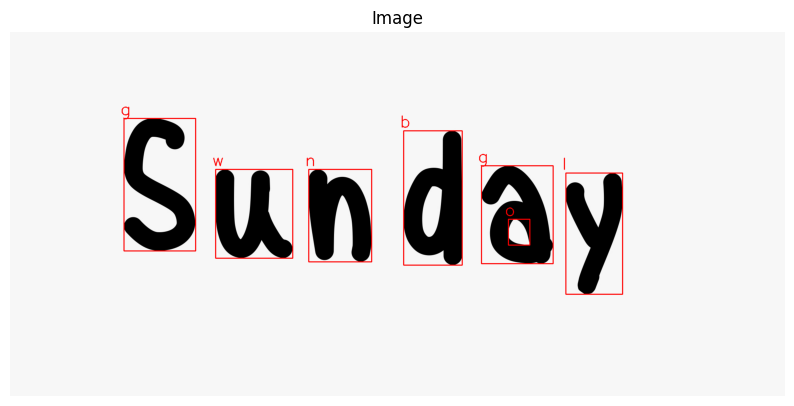

In [68]:
predict_image("./IMG_B71C8CF03DA0-1.jpeg")

In [69]:
import cv2
import numpy as np
import imutils
from tensorflow.keras.models import load_model

# Placeholder function for sorting contours
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

# Placeholder function to show images (for debugging purposes)
def showImage(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load your model here
model = load_model("/content/model.h5")  # Ensure the model path is correct

def predict_image2(path, real=None):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Image at path {path} could not be loaded.")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts, _ = sort_contours(cnts, method="left-to-right")

    chars = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        roi = gray[y:y+h, x:x+w]
        (tH, tW) = roi.shape

        if tH < tW:
            pad = (tW - tH)
            if pad % 2 != 0:
                pad += 1
            pad = pad // 2
            image = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=(255, 255, 255))
        else:
            pad = (tH - tW)
            if pad % 2 != 0:
                pad += 1
            pad = pad // 2
            image = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=(255, 255, 255))

        image = cv2.resize(image, (100, 100))
        image = image >= 180
        image = image.astype("int16") * 255
        image = cv2.merge([image, image, image])
        image = image.astype("float32") / 255.0
        image = np.expand_dims(image, axis=-1)
        chars.append((image, (x, y, w, h)))

    boxes = [b[1] for b in chars]
    chars = np.array([c[0] for c in chars], dtype="float32")

    if len(chars) > 0:
        preds = model.predict(chars)
        labelNames = "abcdefghijklmnopqrstuvwxyz"
        sentence = ""
        for (pred, (x, y, w, h)) in zip(preds, boxes):
            i = np.argmax(pred)
            label = labelNames[i]
            sentence += label
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)

        print(sentence)
        if real:
            print(" ".join(sentence.split()))
            print(" ".join(real.split()))

        showImage(img)


1/1 [==============================] - 2s 2s/step
patzdbt


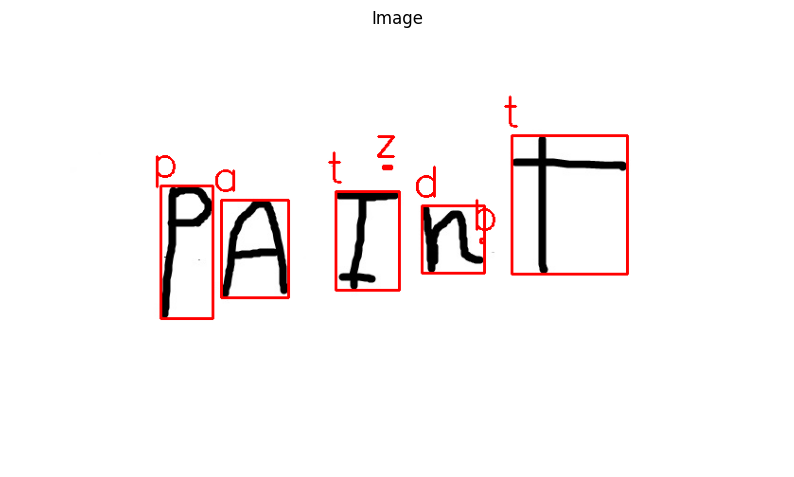

In [70]:
predict_image2("/content/img paint2.jpg")

In [ ]:
!pip install gdown

In [ ]:
import gdown
vgg_model = "https://drive.google.com/uc?id=1Ow383ztTn6hlj-nZdcNQsTMHy_b-mbXO"
gdown.download(vgg_model)

In [ ]:
!pip install gradio

In [ ]:
!pip install imutils


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
import cv2
import imutils
from imutils.contours import sort_contours
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = load_model("model.h5")

def predict_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5),0)
    edged = cv2.Canny(blurred,30,150)
    cnts = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts,method="left-to-right")[0]
    chars = []
    for c in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        roi = gray[y:y+h,x:x+w]
        (tH,tW) = roi.shape
        # showImage(roi)
        if tH < tW:
            pad = (tW - tH)
            if pad % 2 != 0:
                roi = cv2.resize(roi,(tW*2,tH*2))
                image = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT,value=(255,255,255))
            else:
                pad = int(pad / 2)
                image = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT,value=(255,255,255))
        elif tH > tW:
            pad = (tH - tW)
            if pad % 2 != 0:
                roi = cv2.resize(roi,(tW*2,tH*2))
                image = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=(255,255,255))
            else:
                pad = int(pad / 2)
                image = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=(255,255,255))
        image = cv2.resize(image,(100,100))
        image = image >= 180
        image = image.astype("int16") * 255
        image = cv2.merge([image,image,image])
        # showImage(image)
        image = image.astype("float32") / 255.0
        # showImage(image)
        image = np.expand_dims(image,axis=-1)
        chars.append((image,(x,y,w,h)))
    boxes = [b[1] for b in chars]
    chars = np.array([c[0] for c in chars], dtype="float32")
    if len(chars) > 0:
        preds = model.predict(chars)
        labelNames = "abcdefghijklmnopqrstuvwxyz"
        sentence = ""
        for (pred,(x,y,w,h)) in zip(preds,boxes):
            i = np.argmax(pred)
            prob = pred[i]
            label = labelNames[i]
            sentence += label
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(img,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),2)
        return(img,sentence)

# uncomment when wiil use web interface
 #iface = gr.Interface(fn=predict_image, inputs=gr.inputs.Image(),outputs=["image","text"],)
 #iface.launch(share=True,debug=True)